In [ ]:
# !pip install pycaret[full]

In [1]:
# check installed version
import pycaret
pycaret.__version__

'3.3.2'

In [2]:
import pycaret.classification as pyc

In [3]:
import pandas as pd

train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test-2.csv')

In [4]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [6]:
setup = pyc.setup(train_data, target = 'Loan_Status', polynomial_features = True, polynomial_degree = 3, ignore_features = ['Loan_ID'], log_profile = True, log_data = True, session_id = 123)

,Description,Value
0,Session id,123
1,Target,Loan_Status
2,Target type,Binary
3,Target mapping,"N: 0, Y: 1"
4,Original data shape,"(614, 13)"
5,Transformed data shape,"(614, 969)"
6,Transformed train set shape,"(429, 969)"
7,Transformed test set shape,"(185, 969)"
8,Ignore features,1
9,Numeric features,5


In [7]:
pyc.setup?

Signature:
pyc.setup(
    data: Union[dict, list, tuple, numpy.ndarray, scipy.sparse._matrix.spmatrix, pandas.core.frame.DataFrame, NoneType] = None,
    data_func: Optional[Callable[[], Union[dict, list, tuple, numpy.ndarray, scipy.sparse._matrix.spmatrix, pandas.core.frame.DataFrame]]] = None,
    target: Union[int, str, list, tuple, numpy.ndarray, pandas.core.series.Series] = -1,
    index: Union[bool, int, str, list, tuple, numpy.ndarray, pandas.core.series.Series] = True,
    train_size: float = 0.7,
    test_data: Union[dict, list, tuple, numpy.ndarray, scipy.sparse._matrix.spmatrix, pandas.core.frame.DataFrame, NoneType] = None,
    ordinal_features: Optional[Dict[str, list]] = None,
    numeric_features: Optional[List[str]] = None,
    categorical_features: Optional[List[str]] = None,
    date_features: Optional[List[str]] = None,
    text_features: Optional[List[str]] = None,
    ignore_features: Optional[List[str]] = None,
    keep_features: Optional[List[str]] = None,
    pr

In [8]:
pyc.get_config()

{'USI',
 'X',
 'X_test',
 'X_test_transformed',
 'X_train',
 'X_train_transformed',
 'X_transformed',
 '_available_plots',
 '_ml_usecase',
 'data',
 'dataset',
 'dataset_transformed',
 'exp_id',
 'exp_name_log',
 'fix_imbalance',
 'fold_generator',
 'fold_groups_param',
 'fold_shuffle_param',
 'gpu_n_jobs_param',
 'gpu_param',
 'html_param',
 'idx',
 'is_multiclass',
 'log_plots_param',
 'logging_param',
 'memory',
 'n_jobs_param',
 'pipeline',
 'seed',
 'target_param',
 'test',
 'test_transformed',
 'train',
 'train_transformed',
 'variable_and_property_keys',
 'variables',
 'y',
 'y_test',
 'y_test_transformed',
 'y_train',
 'y_train_transformed',
 'y_transformed'}

In [9]:
pyc.get_config('X')

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
433,Male,Yes,0,Graduate,No,2425,2340.0,143.0,360.0,1.0,Semiurban
69,Female,No,0,Graduate,No,4300,0.0,136.0,360.0,0.0,Semiurban
49,Female,No,0,Graduate,No,4000,2275.0,144.0,360.0,1.0,Semiurban
175,Male,Yes,0,Graduate,No,3497,1964.0,116.0,360.0,1.0,Rural
502,Male,Yes,2,Graduate,No,4865,5624.0,208.0,360.0,1.0,Semiurban
...,...,...,...,...,...,...,...,...,...,...,...
574,Male,Yes,3+,Graduate,No,6406,0.0,150.0,360.0,1.0,Semiurban
42,Male,Yes,0,Graduate,No,2400,0.0,75.0,360.0,NaN,Urban
50,Female,Yes,0,Not Graduate,No,1928,1644.0,100.0,360.0,1.0,Semiurban
189,Male,Yes,0,Graduate,No,9328,0.0,188.0,180.0,1.0,Rural


In [10]:
pyc.get_config('X').isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
dtype: int64

In [11]:
pyc.get_config('X_train_transformed')

,Gender,Married,Dependents_0,Dependents_2,Dependents_3+,Dependents_1,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,...,Property_Area_Semiurban^3,Property_Area_Semiurban^2 Property_Area_Rural,Property_Area_Semiurban^2 Property_Area_Urban,Property_Area_Semiurban Property_Area_Rural^2,Property_Area_Semiurban Property_Area_Rural Property_Area_Urban,Property_Area_Semiurban Property_Area_Urban^2,Property_Area_Rural^3,Property_Area_Rural^2 Property_Area_Urban,Property_Area_Rural Property_Area_Urban^2,Property_Area_Urban^3
433,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2425.0,2340.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4300.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4000.0,2275.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
175,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,3497.0,1964.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
502,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,4865.0,5624.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3244.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
133,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,3459.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
512,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,3283.0,2035.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
395,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,3276.0,484.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
pyc.get_config('X_train_transformed').isna().sum()

Gender                                           0
Married                                          0
Dependents_0                                     0
Dependents_2                                     0
Dependents_3+                                    0
                                                ..
Property_Area_Semiurban Property_Area_Urban^2    0
Property_Area_Rural^3                            0
Property_Area_Rural^2 Property_Area_Urban        0
Property_Area_Rural Property_Area_Urban^2        0
Property_Area_Urban^3                            0
Length: 968, dtype: int64

In [13]:

pyc.get_config('pipeline')

Pipeline(memory=FastMemory(location=/var/folders/cv/kmsppstx0d9281mtbqrrgl6c0000gn/T/joblib),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['ApplicantIncome',
                                             'CoapplicantIncome', 'LoanAmount',
                                             'Loan_Amount_Term',
                                             'Credit_History...
                                    transformer=OneHotEncoder(cols=['Dependents',
                                                                    'Property_Area'],
                                                              drop_invariant=False,
                                                              handle_missing='return_nan',
                                                              handle_unknown='value',
                                                              return_df=True,
                                                              use_cat_names=True,
                                                              verbose=0))),
                ('polynomial_features',
                 TransformerWrapper(exclude=None, include=None,
                                    transformer=PolynomialFeatures(degree=3,
                                                                   include_bias=False,
                                                                   interaction_only=False,
                                                                   order='C')))],
         verbose=False)

In [14]:
pyc.models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [15]:
best = pyc.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.7950,0.7676,0.7950,0.7931,0.7790,0.4688,0.4919,0.0530
gbc,Gradient Boosting Classifier,0.7833,0.7457,0.7833,0.7781,0.7687,0.4456,0.4633,0.2400
lightgbm,Light Gradient Boosting Machine,0.7554,0.7479,0.7554,0.7453,0.7446,0.3904,0.3982,0.4620
et,Extra Trees Classifier,0.7483,0.7097,0.7483,0.7410,0.7405,0.3854,0.3908,0.0470
ada,Ada Boost Classifier,0.7482,0.7005,0.7482,0.7499,0.7362,0.3779,0.3962,0.0760
dt,Decision Tree Classifier,0.7016,0.6607,0.7016,0.7109,0.7001,0.3126,0.3195,0.0310
dummy,Dummy Classifier,0.6877,0.5000,0.6877,0.4730,0.5604,0.0000,0.0000,0.0510
lr,Logistic Regression,0.6783,0.4980,0.6783,0.5150,0.5632,-0.0074,-0.0112,0.5700
knn,K Neighbors Classifier,0.6062,0.4882,0.6062,0.5503,0.5638,-0.0459,-0.0478,0.0180
svm,SVM - Linear Kernel,0.5830,0.4985,0.5830,0.5244,0.5187,-0.0221,-0.0077,0.0170


In [16]:
best

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=100, n_jobs=-1,
                       oob_score=False, random_state=123, verbose=0,
                       warm_start=False)

In [19]:
pyc.dashboard('rf')

ModuleNotFoundError: 
'explainerdashboard' is a soft dependency and not included in the pycaret installation. Please run: `pip install explainerdashboard` to install.
Alternately, you can install this by running `pip install pycaret[analysis]`

In [23]:
pyc.create_api(best, 'lr_api')


ModuleNotFoundError: 
'fastapi' is a soft dependency and not included in the pycaret installation. Please run: `pip install fastapi` to install.
Alternately, you can install this by running `pip install pycaret[mlops]`

In [25]:
pyc.create_app(best)

ModuleNotFoundError: 
'gradio' is a soft dependency and not included in the pycaret installation. Please run: `pip install gradio` to install.
Alternately, you can install this by running `pip install pycaret[mlops]`

In [ ]:
rf = pyc.create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7907,0.7962,0.7907,0.7825,0.7820,0.4691,0.4767
1,0.6744,0.6872,0.6744,0.6334,0.6404,0.1121,0.1212
2,0.7674,0.6513,0.7674,0.7743,0.7294,0.3323,0.3931
3,0.8140,0.9141,0.8140,0.8212,0.7945,0.4926,0.5327
4,0.8372,0.8551,0.8372,0.8338,0.8305,0.5871,0.5965
5,0.8140,0.7401,0.8140,0.8123,0.8045,0.5426,0.5573
6,0.7674,0.7155,0.7674,0.7593,0.7556,0.4282,0.4399
7,0.8372,0.7759,0.8372,0.8448,0.8260,0.5916,0.6185
8,0.7907,0.6589,0.7907,0.8036,0.7671,0.4526,0.5002


In [47]:
rf_tune = pyc.tune_model(rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8140,0.7141,0.8140,0.8212,0.7945,0.4926,0.5327
1,0.8140,0.7013,0.8140,0.8531,0.7836,0.4658,0.5510
2,0.7674,0.6141,0.7674,0.7743,0.7294,0.3323,0.3931
3,0.7674,0.5846,0.7674,0.8256,0.7114,0.2951,0.4160
4,0.8605,0.8654,0.8605,0.8638,0.8521,0.6376,0.6571
5,0.7907,0.7845,0.7907,0.7888,0.7763,0.4749,0.4965
6,0.7907,0.6884,0.7907,0.7888,0.7763,0.4749,0.4965
7,0.8372,0.7192,0.8372,0.8448,0.8260,0.5916,0.6185
8,0.7907,0.7365,0.7907,0.8403,0.7552,0.4284,0.5221


Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [48]:
rf_tune = pyc.tune_model(rf, optimize = 'AUC')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7674,0.7410,0.7674,0.7556,0.7536,0.3961,0.4082
1,0.6977,0.6897,0.6977,0.6694,0.6733,0.1957,0.2058
2,0.7209,0.6179,0.7209,0.6960,0.6918,0.2389,0.2584
3,0.7442,0.7821,0.7442,0.7455,0.6932,0.2456,0.3122
4,0.8372,0.7000,0.8372,0.8338,0.8305,0.5871,0.5965
5,0.8372,0.8079,0.8372,0.8448,0.8260,0.5916,0.6185
6,0.7674,0.7833,0.7674,0.7645,0.7466,0.4044,0.4330
7,0.7674,0.7906,0.7674,0.7609,0.7624,0.4501,0.4529
8,0.7674,0.6675,0.7674,0.7645,0.7466,0.4044,0.4330


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [30]:
print(lgbm_tune)

LGBMClassifier(bagging_fraction=0.6, bagging_freq=2, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.4,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=41, min_child_weight=0.001, min_split_gain=0.9,
               n_estimators=260, n_jobs=-1, num_leaves=70, objective=None,
               random_state=123, reg_alpha=2, reg_lambda=3, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)


In [51]:
pyc.models(type = 'ensemble')

,Name,Reference,Turbo
ID,,,
rf,Random Forest Classifier,sklearn.ensemble._forest.RandomForestClassifier,True
ada,Ada Boost Classifier,sklearn.ensemble._weight_boosting.AdaBoostClas...,True
gbc,Gradient Boosting Classifier,sklearn.ensemble._gb.GradientBoostingClassifier,True
et,Extra Trees Classifier,sklearn.ensemble._forest.ExtraTreesClassifier,True
lightgbm,Light Gradient Boosting Machine,lightgbm.sklearn.LGBMClassifier,True


In [54]:
dt = pyc.create_model('dt')
pyc.ensemble_model(dt, method = 'Bagging')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7209,0.7346,0.7209,0.7696,0.7316,0.4150,0.4339
1,0.6744,0.5487,0.6744,0.6334,0.6404,0.1121,0.1212
2,0.6047,0.5641,0.6047,0.6302,0.6147,0.1203,0.1218
3,0.7209,0.6256,0.7209,0.7015,0.7043,0.2753,0.2837
4,0.8372,0.8397,0.8372,0.8538,0.8413,0.6378,0.6456
5,0.6977,0.6835,0.6977,0.7171,0.7041,0.3477,0.3517
6,0.6744,0.6108,0.6744,0.6632,0.6673,0.2302,0.2316
7,0.6279,0.6133,0.6279,0.6573,0.6374,0.2110,0.2152
8,0.7907,0.7340,0.7907,0.7848,0.7833,0.4954,0.5026


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7209,0.7372,0.7209,0.7209,0.7209,0.3385,0.3385
1,0.6744,0.6859,0.6744,0.6607,0.6661,0.1930,0.1943
2,0.7442,0.6064,0.7442,0.7272,0.7236,0.3194,0.3359
3,0.7907,0.8679,0.7907,0.7988,0.7631,0.4145,0.4656
4,0.7907,0.7949,0.7907,0.7958,0.7928,0.5144,0.5152
5,0.6977,0.7352,0.6977,0.7035,0.7002,0.3241,0.3245
6,0.7209,0.7438,0.7209,0.7121,0.7148,0.3402,0.3422
7,0.6977,0.7549,0.6977,0.6924,0.6946,0.2986,0.2991
8,0.7674,0.7131,0.7674,0.7593,0.7556,0.4282,0.4399


BaggingClassifier(bootstrap=True, bootstrap_features=False,
                  estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                   class_weight=None,
                                                   criterion='gini',
                                                   max_depth=None,
                                                   max_features=None,
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   monotonic_cst=None,
                                                   random_state=123,
                                                   splitter='best'),
                  max_features=1.0, max_samples=1.0, n_estimators=10,
                  n_jobs=None, oob_score=False, random_state=123, verbose=0,
                  warm_start=False)

In [28]:
lr = pyc.create_model('lr')
rf = pyc.create_model('rf')
gbc = pyc.create_model('gbc')

blender = pyc.blend_models([lr, rf, gbc], method = 'soft')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6512,0.3872,0.6512,0.4765,0.5503,-0.0877,-0.1454
1,0.6977,0.6897,0.6977,0.4867,0.5734,0.0000,0.0000
2,0.6977,0.3974,0.6977,0.4867,0.5734,0.0000,0.0000
3,0.6744,0.4949,0.6744,0.4817,0.5620,-0.0451,-0.1016
4,0.6744,0.5103,0.6744,0.4817,0.5620,-0.0451,-0.1016
5,0.6977,0.6502,0.6977,0.7913,0.5943,0.0940,0.2221
6,0.6744,0.4754,0.6744,0.4548,0.5433,0.0000,0.0000
7,0.6744,0.4606,0.6744,0.4548,0.5433,0.0000,0.0000
8,0.6744,0.4877,0.6744,0.4548,0.5433,0.0000,0.0000


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7907,0.7962,0.7907,0.7825,0.7820,0.4691,0.4767
1,0.6744,0.6872,0.6744,0.6334,0.6404,0.1121,0.1212
2,0.7674,0.6513,0.7674,0.7743,0.7294,0.3323,0.3931
3,0.8140,0.9141,0.8140,0.8212,0.7945,0.4926,0.5327
4,0.8372,0.8551,0.8372,0.8338,0.8305,0.5871,0.5965
5,0.8140,0.7401,0.8140,0.8123,0.8045,0.5426,0.5573
6,0.7674,0.7155,0.7674,0.7593,0.7556,0.4282,0.4399
7,0.8372,0.7759,0.8372,0.8448,0.8260,0.5916,0.6185
8,0.7907,0.6589,0.7907,0.8036,0.7671,0.4526,0.5002


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8372,0.7500,0.8372,0.8338,0.8305,0.5871,0.5965
1,0.6512,0.5667,0.6512,0.6117,0.6231,0.0719,0.0757
2,0.7674,0.6487,0.7674,0.7743,0.7294,0.3323,0.3931
3,0.7674,0.8564,0.7674,0.7586,0.7431,0.3658,0.3955
4,0.8605,0.8769,0.8605,0.8578,0.8569,0.6542,0.6585
5,0.7907,0.7660,0.7907,0.7848,0.7833,0.4954,0.5026
6,0.7442,0.8054,0.7442,0.7341,0.7351,0.3833,0.3889
7,0.7907,0.7635,0.7907,0.7848,0.7833,0.4954,0.5026
8,0.7907,0.6034,0.7907,0.8036,0.7671,0.4526,0.5002


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7907,0.7154,0.7907,0.7849,0.7738,0.4432,0.4660
1,0.6977,0.6769,0.6977,0.6603,0.6578,0.1543,0.1733
2,0.7674,0.5974,0.7674,0.7743,0.7294,0.3323,0.3931
3,0.7442,0.9077,0.7442,0.7455,0.6932,0.2456,0.3122
4,0.8372,0.8897,0.8372,0.8338,0.8305,0.5871,0.5965
5,0.8372,0.7808,0.8372,0.8448,0.8260,0.5916,0.6185
6,0.7907,0.7291,0.7907,0.8036,0.7671,0.4526,0.5002
7,0.7907,0.7660,0.7907,0.7888,0.7763,0.4749,0.4965
8,0.7907,0.6305,0.7907,0.8403,0.7552,0.4284,0.5221


In [29]:
blender_tune = pyc.tune_model(blender, optimize = 'AUC')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7907,0.7974,0.7907,0.7825,0.7820,0.4691,0.4767
1,0.6744,0.6744,0.6744,0.6334,0.6404,0.1121,0.1212
2,0.7674,0.6487,0.7674,0.7743,0.7294,0.3323,0.3931
3,0.7907,0.9231,0.7907,0.7988,0.7631,0.4145,0.4656
4,0.8372,0.8718,0.8372,0.8338,0.8305,0.5871,0.5965
5,0.8140,0.7389,0.8140,0.8123,0.8045,0.5426,0.5573
6,0.7674,0.7167,0.7674,0.7593,0.7556,0.4282,0.4399
7,0.8372,0.7759,0.8372,0.8448,0.8260,0.5916,0.6185
8,0.8140,0.6502,0.8140,0.8542,0.7880,0.5029,0.5796


Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [30]:
blender = pyc.blend_models(pyc.compare_models(n_select = 3), method = 'soft')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.7950,0.7676,0.7950,0.7931,0.7790,0.4688,0.4919,0.0430
gbc,Gradient Boosting Classifier,0.7833,0.7457,0.7833,0.7781,0.7687,0.4456,0.4633,0.2150
lightgbm,Light Gradient Boosting Machine,0.7554,0.7479,0.7554,0.7453,0.7446,0.3904,0.3982,0.3790
et,Extra Trees Classifier,0.7483,0.7097,0.7483,0.7410,0.7405,0.3854,0.3908,0.0370
ada,Ada Boost Classifier,0.7482,0.7005,0.7482,0.7499,0.7362,0.3779,0.3962,0.0700
dt,Decision Tree Classifier,0.7016,0.6607,0.7016,0.7109,0.7001,0.3126,0.3195,0.0240
dummy,Dummy Classifier,0.6877,0.5000,0.6877,0.4730,0.5604,0.0000,0.0000,0.0170
lr,Logistic Regression,0.6783,0.4980,0.6783,0.5150,0.5632,-0.0074,-0.0112,0.0750
knn,K Neighbors Classifier,0.6062,0.4882,0.6062,0.5503,0.5638,-0.0459,-0.0478,0.0160
svm,SVM - Linear Kernel,0.5830,0.4985,0.5830,0.5244,0.5187,-0.0221,-0.0077,0.0170


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7442,0.7718,0.7442,0.7311,0.7336,0.3512,0.3568
1,0.6977,0.6513,0.6977,0.6603,0.6578,0.1543,0.1733
2,0.7674,0.6359,0.7674,0.7743,0.7294,0.3323,0.3931
3,0.7674,0.8949,0.7674,0.7586,0.7431,0.3658,0.3955
4,0.8372,0.8538,0.8372,0.8338,0.8305,0.5871,0.5965
5,0.7442,0.7167,0.7442,0.7341,0.7351,0.3833,0.3889
6,0.7674,0.7488,0.7674,0.7593,0.7556,0.4282,0.4399
7,0.7907,0.7685,0.7907,0.7848,0.7833,0.4954,0.5026
8,0.7674,0.6650,0.7674,0.7645,0.7466,0.4044,0.4330


In [31]:
blender = pyc.blend_models(pyc.compare_models(n_select = 3), method = 'hard')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.7950,0.7676,0.7950,0.7931,0.7790,0.4688,0.4919,0.0550
gbc,Gradient Boosting Classifier,0.7833,0.7457,0.7833,0.7781,0.7687,0.4456,0.4633,0.2040
lightgbm,Light Gradient Boosting Machine,0.7554,0.7479,0.7554,0.7453,0.7446,0.3904,0.3982,0.4890
et,Extra Trees Classifier,0.7483,0.7097,0.7483,0.7410,0.7405,0.3854,0.3908,0.0550
ada,Ada Boost Classifier,0.7482,0.7005,0.7482,0.7499,0.7362,0.3779,0.3962,0.0600
dt,Decision Tree Classifier,0.7016,0.6607,0.7016,0.7109,0.7001,0.3126,0.3195,0.0240
dummy,Dummy Classifier,0.6877,0.5000,0.6877,0.4730,0.5604,0.0000,0.0000,0.0150
lr,Logistic Regression,0.6783,0.4980,0.6783,0.5150,0.5632,-0.0074,-0.0112,0.0780
knn,K Neighbors Classifier,0.6062,0.4882,0.6062,0.5503,0.5638,-0.0459,-0.0478,0.0180
svm,SVM - Linear Kernel,0.5830,0.4985,0.5830,0.5244,0.5187,-0.0221,-0.0077,0.0180


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8140,0.0000,0.8140,0.8097,0.8029,0.5169,0.5326
1,0.6977,0.0000,0.6977,0.6603,0.6578,0.1543,0.1733
2,0.7674,0.0000,0.7674,0.7743,0.7294,0.3323,0.3931
3,0.7907,0.0000,0.7907,0.7849,0.7738,0.4432,0.4660
4,0.8372,0.0000,0.8372,0.8338,0.8305,0.5871,0.5965
5,0.7907,0.0000,0.7907,0.7888,0.7763,0.4749,0.4965
6,0.7674,0.0000,0.7674,0.7593,0.7556,0.4282,0.4399
7,0.8140,0.0000,0.8140,0.8123,0.8045,0.5426,0.5573
8,0.7674,0.0000,0.7674,0.7645,0.7466,0.4044,0.4330


In [32]:
lightgbm = pyc.create_model('lightgbm')

stacker = pyc.stack_models([lr, rf, gbc], meta_model = lightgbm)


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7674,0.7179,0.7674,0.7556,0.7536,0.3961,0.4082
1,0.6512,0.6923,0.6512,0.6117,0.6231,0.0719,0.0757
2,0.7209,0.6513,0.7209,0.7015,0.7043,0.2753,0.2837
3,0.8140,0.8513,0.8140,0.8097,0.8029,0.5169,0.5326
4,0.7674,0.7744,0.7674,0.7674,0.7674,0.4487,0.4487
5,0.7442,0.6724,0.7442,0.7341,0.7351,0.3833,0.3889
6,0.7442,0.7734,0.7442,0.7341,0.7351,0.3833,0.3889
7,0.7674,0.7709,0.7674,0.7593,0.7556,0.4282,0.4399
8,0.7674,0.7266,0.7674,0.7593,0.7556,0.4282,0.4399


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7907,0.8410,0.7907,0.7849,0.7738,0.4432,0.4660
1,0.7442,0.6615,0.7442,0.7455,0.6932,0.2456,0.3122
2,0.6977,0.6077,0.6977,0.6694,0.6733,0.1957,0.2058
3,0.6744,0.7462,0.6744,0.6474,0.6550,0.1545,0.1592
4,0.7907,0.7513,0.7907,0.7867,0.7882,0.4928,0.4936
5,0.8140,0.7808,0.8140,0.8123,0.8045,0.5426,0.5573
6,0.7442,0.7414,0.7442,0.7341,0.7351,0.3833,0.3889
7,0.7209,0.7562,0.7209,0.7209,0.7209,0.3645,0.3645
8,0.8140,0.6453,0.8140,0.8244,0.7973,0.5235,0.5606


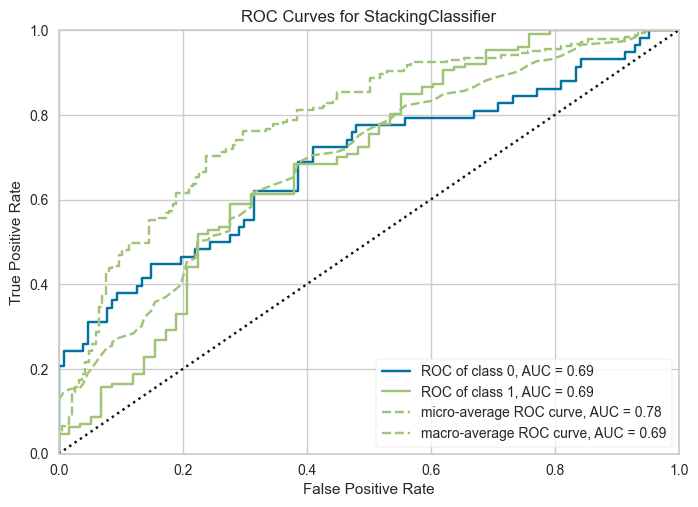

In [33]:
pyc.plot_model(stacker, plot = 'auc')

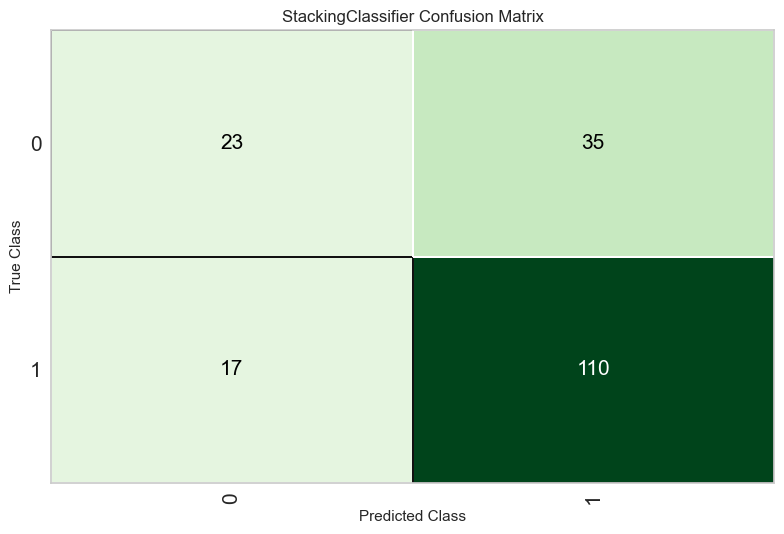

In [34]:
pyc.plot_model(stacker, plot = 'confusion_matrix')

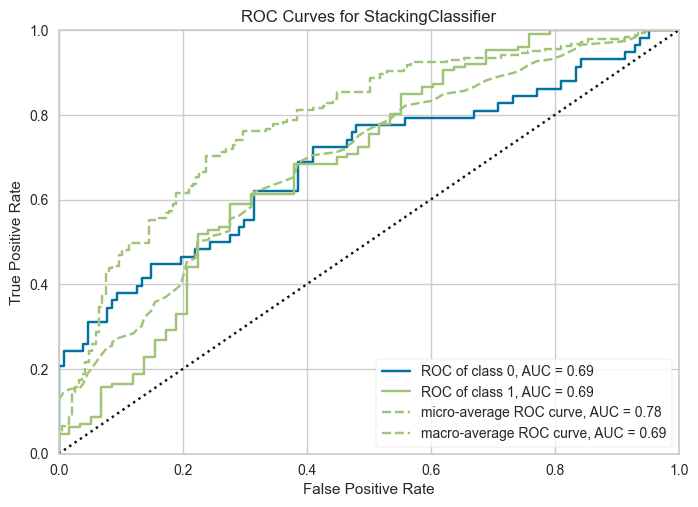

In [35]:
pyc.plot_model(stacker)

In [38]:

pyc.dashboard(stacker)


ModuleNotFoundError: 
'explainerdashboard' is a soft dependency and not included in the pycaret installation. Please run: `pip install explainerdashboard` to install.
Alternately, you can install this by running `pip install pycaret[analysis]`

In [40]:

pyc.predict_model(stacker)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Stacking Classifier,0.7189,0.6869,0.7189,0.7011,0.7024,0.2869,0.2960


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,prediction_label,prediction_score
354,Female,Yes,0,Graduate,No,2423,505.0,130.0,360.0,1.0,Semiurban,Y,Y,0.9431
426,Female,No,1,Not Graduate,No,4606,0.0,81.0,360.0,1.0,Rural,N,N,0.5074
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,Y,0.8435
214,Male,Yes,0,Graduate,No,3173,3021.0,137.0,360.0,1.0,Urban,Y,Y,0.9825
72,Male,No,0,Graduate,No,3500,0.0,81.0,300.0,1.0,Semiurban,Y,Y,0.7437
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
574,Male,Yes,3+,Graduate,No,6406,0.0,150.0,360.0,1.0,Semiurban,N,Y,0.8140
42,Male,Yes,0,Graduate,No,2400,0.0,75.0,360.0,NaN,Urban,Y,Y,0.7013
50,Female,Yes,0,Not Graduate,No,1928,1644.0,100.0,360.0,1.0,Semiurban,Y,Y,0.8925
189,Male,Yes,0,Graduate,No,9328,0.0,188.0,180.0,1.0,Rural,Y,Y,0.9239


In [41]:
pyc.predict_model(stacker, data = test_data)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,prediction_label,prediction_score
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,Y,0.9866
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,Y,0.8750
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,Y,0.9705
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban,Y,0.9104
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,N,0.7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban,Y,0.9852
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban,Y,0.9261
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban,Y,0.9819
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural,Y,0.9697


In [42]:
model_production = pyc.finalize_model(stacker)

In [43]:
model_production

Pipeline(memory=Memory(location=None),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['ApplicantIncome',
                                             'CoapplicantIncome', 'LoanAmount',
                                             'Loan_Amount_Term',
                                             'Credit_History'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=T...
                                                                   importance_type='split',
                                                                   learning_rate=0.1,
                                                                   max_depth=-1,
                                                                   min_child_samples=20,
                                                                   min_child_weight=0.001,
                                                                   min_split_gain=0.0,
                                                                   n_estimators=100,
                                                                   n_jobs=-1,
                                                                   num_leaves=31,
                                                                   objective=None,
                                                                   random_state=123,
                                                                   reg_alpha=0.0,
                                                                   reg_lambda=0.0,
                                                                   subsample=1.0,
                                                                   subsample_for_bin=200000,
                                                                   subsample_freq=0),
                                    n_jobs=-1, passthrough=False,
                                    stack_method='auto', verbose=0))],
         verbose=False)

In [44]:
pyc.save_model(model_production, 'loan_approval_model_0524')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['ApplicantIncome',
                                              'CoapplicantIncome', 'LoanAmount',
                                              'Loan_Amount_Term',
                                              'Credit_History'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=T...
                                                                    importance_type='split',
                                                                    learning_rate=0.1,
                                                                  

In [45]:
loaded_model = pyc.load_model('loan_approval_model_0524')

Transformation Pipeline and Model Successfully Loaded


In [46]:
pyc.predict_model(loaded_model, data = test_data)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,prediction_label,prediction_score
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,Y,0.9867
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,Y,0.9550
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,Y,0.8631
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban,Y,0.8811
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,Y,0.7118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban,N,0.5476
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban,Y,0.9877
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban,Y,0.9508
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural,N,0.9072


In [50]:
pyc.automl(optimize = 'Accuracy')

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=100, n_jobs=-1,
                       oob_score=False, random_state=123, verbose=0,
                       warm_start=False)

In [53]:
rf = pyc.create_model('rf')
pyc.dashboard(rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7907,0.7962,0.7907,0.7825,0.7820,0.4691,0.4767
1,0.6744,0.6872,0.6744,0.6334,0.6404,0.1121,0.1212
2,0.7674,0.6513,0.7674,0.7743,0.7294,0.3323,0.3931
3,0.8140,0.9141,0.8140,0.8212,0.7945,0.4926,0.5327
4,0.8372,0.8551,0.8372,0.8338,0.8305,0.5871,0.5965
5,0.8140,0.7401,0.8140,0.8123,0.8045,0.5426,0.5573
6,0.7674,0.7155,0.7674,0.7593,0.7556,0.4282,0.4399
7,0.8372,0.7759,0.8372,0.8448,0.8260,0.5916,0.6185
8,0.7907,0.6589,0.7907,0.8036,0.7671,0.4526,0.5002


ModuleNotFoundError: 
'explainerdashboard' is a soft dependency and not included in the pycaret installation. Please run: `pip install explainerdashboard` to install.
Alternately, you can install this by running `pip install pycaret[analysis]`

In [54]:
!pip install explainerdashboard

  Using cached explainerdashboard-0.5.1-py3-none-any.whl.metadata (32 kB)
  Using cached dash_auth-2.3.0-py3-none-any.whl.metadata (10 kB)
  Using cached flask_simplelogin-0.2.0-py3-none-any.whl.metadata (3.3 kB)
  Using cached flask_wtf-1.2.2-py3-none-any.whl.metadata (3.4 kB)
  Using cached graphviz-0.21-py3-none-any.whl.metadata (12 kB)
  Using cached jupyter_dash-0.4.2-py3-none-any.whl.metadata (3.6 kB)
  Using cached oyaml-1.0-py2.py3-none-any.whl.metadata (1.2 kB)
  Using cached waitress-3.0.2-py3-none-any.whl.metadata (5.8 kB)
INFO: pip is looking at multiple versions of dash-bootstrap-components to determine which version is compatible with other requirements. This could take a while.
  Using cached dash_bootstrap_components-1.7.1-py3-none-any.whl.metadata (17 kB)
  Using cached colour-0.1.5-py2.py3-none-any.whl.metadata (18 kB)
  Using cached wtforms-3.2.1-py3-none-any.whl.metadata (5.3 kB)
INFO: pip is looking at multiple versions of shap to determine which version is compati

In [21]:
!pip install 'pycaret[analysis]'

  Using cached shap-0.44.1-cp311-cp311-macosx_11_0_arm64.whl.metadata (24 kB)
  Using cached interpret-0.7.4-py3-none-any.whl.metadata (1.2 kB)
  Using cached umap_learn-0.5.11-py3-none-any.whl.metadata (26 kB)
  Using cached ydata_profiling-4.18.1-py2.py3-none-any.whl.metadata (22 kB)
  Using cached fairlearn-0.7.0-py3-none-any.whl.metadata (7.3 kB)
INFO: pip is looking at multiple versions of interpret-core to determine which version is compatible with other requirements. This could take a while.
  Using cached dash_cytoscape-1.0.2.tar.gz (4.0 MB)
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 5.5 MB/s  0:00:00 eta 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
INFO: pip is looking at multiple versions of salib to determine which version is compatible with other requirements. This could take a while.
  Using cached salib-1.5.1-py3-none-any